In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from xgboost import plot_importance

In [3]:
# Loading Datasets
urban_df = pd.read_csv('/content/data/urban.csv')
suburban_df = pd.read_csv('/content/data/sub-urban.csv')
rural_df = pd.read_csv('/content/data/rural.csv')
industrial_df = pd.read_csv('/content/data/industrial.csv')

In [4]:
# Adding Column for Station-types
urban_df['station_type'] = 'Urban'
suburban_df['station_type'] = 'Suburban'
rural_df['station_type'] = 'Rural'
industrial_df['station_type'] = 'Industrial'

In [5]:
df = pd.concat([urban_df, suburban_df, rural_df, industrial_df], ignore_index=True)

In [6]:
df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,station_type
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Urban
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Urban
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Urban
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Urban
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Urban
5,6,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,Guanyuan,Urban
6,7,2013,3,1,6,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Guanyuan,Urban
7,8,2013,3,1,7,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Guanyuan,Urban
8,9,2013,3,1,8,3.0,6.0,9.0,37.0,500.0,50.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Guanyuan,Urban
9,10,2013,3,1,9,7.0,11.0,9.0,30.0,400.0,58.0,1.2,1028.5,-19.3,0.0,N,2.6,Guanyuan,Urban


In [7]:
df.shape

(140256, 19)

In [8]:
print("Columns:", df.columns.tolist())

Columns: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'station_type']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   No            140256 non-null  int64  
 1   year          140256 non-null  int64  
 2   month         140256 non-null  int64  
 3   day           140256 non-null  int64  
 4   hour          140256 non-null  int64  
 5   PM2.5         137024 non-null  float64
 6   PM10          137949 non-null  float64
 7   SO2           136843 non-null  float64
 8   NO2           134992 non-null  float64
 9   CO            131706 non-null  float64
 10  O3            135779 non-null  float64
 11  TEMP          140114 non-null  float64
 12  PRES          140112 non-null  float64
 13  DEWP          140109 non-null  float64
 14  RAIN          140110 non-null  float64
 15  wd            139312 non-null  object 
 16  WSPM          140135 non-null  float64
 17  station       140256 non-null  object 
 18  stat

In [10]:
station_groups = df.groupby('station_type')

for name, group in station_groups:
    print(f"\n Descriptive Stats for {name} station:")
    display(group.describe())
    print("Missing values:\n", group.isnull().sum())


 Descriptive Stats for Industrial station:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Missing values:
 No                 0
year               0
month              0
day                0
hour               0
PM2.5            750
PM10             553
SO2              663
NO2             1601
CO              3197
O3               664
TEMP              20
PRES              20
DEWP              20
RAIN              20
wd                78
WSPM              14
station            0
station_type       0
dtype: int64

 Descriptive Stats for Rural station:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Missing values:
 No                 0
year               0
month              0
day                0
hour               0
PM2.5            953
PM10             777
SO2              980
NO2             1639
CO              1422
O3              1151
TEMP              51
PRES              53
DEWP              53
RAIN              55
wd               302
WSPM              49
station            0
station_type       0
dtype: int64

 Descriptive Stats for Suburban station:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Missing values:
 No                 0
year               0
month              0
day                0
hour               0
PM2.5            913
PM10             548
SO2             1296
NO2             1365
CO              2178
O3              1489
TEMP              51
PRES              51
DEWP              54
RAIN              51
wd               483
WSPM              44
station            0
station_type       0
dtype: int64

 Descriptive Stats for Urban station:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Missing values:
 No                 0
year               0
month              0
day                0
hour               0
PM2.5            616
PM10             429
SO2              474
NO2              659
CO              1753
O3              1173
TEMP              20
PRES              20
DEWP              20
RAIN              20
wd                81
WSPM              14
station            0
station_type       0
dtype: int64


In [11]:
processed_dfs = []

for name, group in station_groups:
    station_df = group.copy()

    # Filling numeric NaNs with median of that group
    for col in station_df.select_dtypes(include=[np.number]).columns:
        station_df[col] = station_df[col].fillna(station_df[col].median())

    # Filling col 'wd' with mode of that group
    if station_df['wd'].isnull().sum() > 0:
        station_df['wd'] = station_df['wd'].fillna(station_df['wd'].mode()[0])

    processed_dfs.append(station_df)

# Combined dataset
df_cleaned = pd.concat(processed_dfs, ignore_index=True)

In [12]:
df_cleaned.shape

(140256, 19)

In [13]:
# Label Encoding to create datetime
df_cleaned['datetime'] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour']])
df_cleaned.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_cleaned = pd.get_dummies(df_cleaned, columns=['wd'], prefix='wind')

In [14]:
print("\n Final shape after station-wise cleaning:", df_cleaned.shape)
print("Remaining missing values:", df_cleaned.isnull().sum().sum())


 Final shape after station-wise cleaning: (140256, 30)
Remaining missing values: 0


## EDA

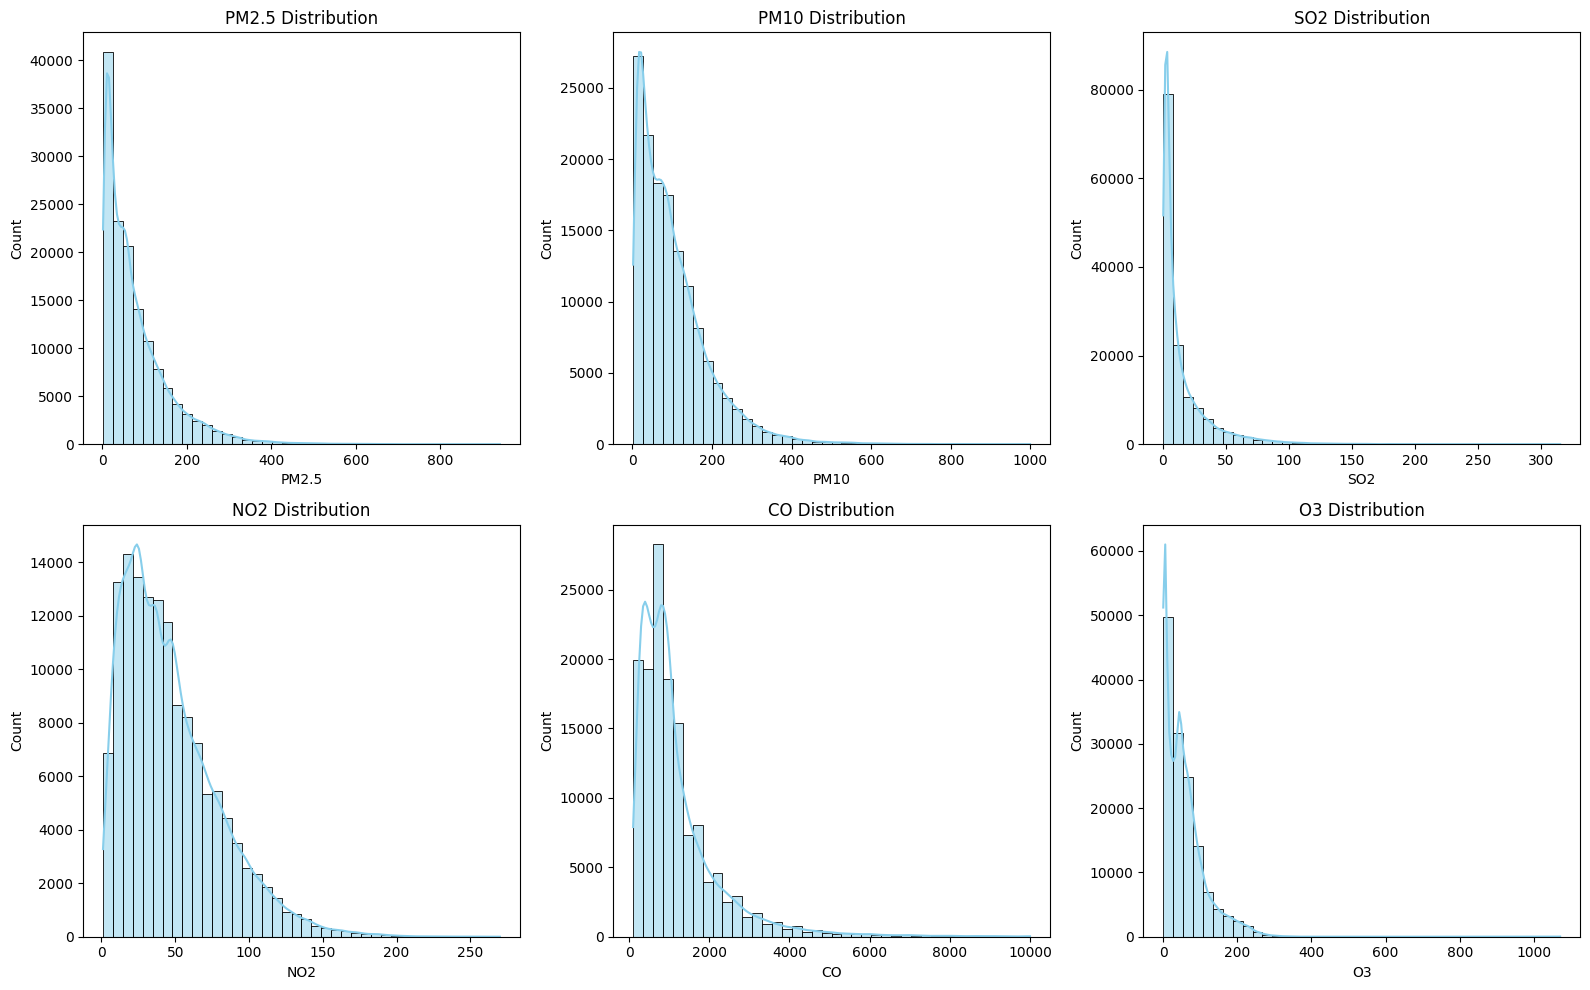

In [15]:
# Distribution plots for major pollutants
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(16, 10))
for i, col in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True, bins=40, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

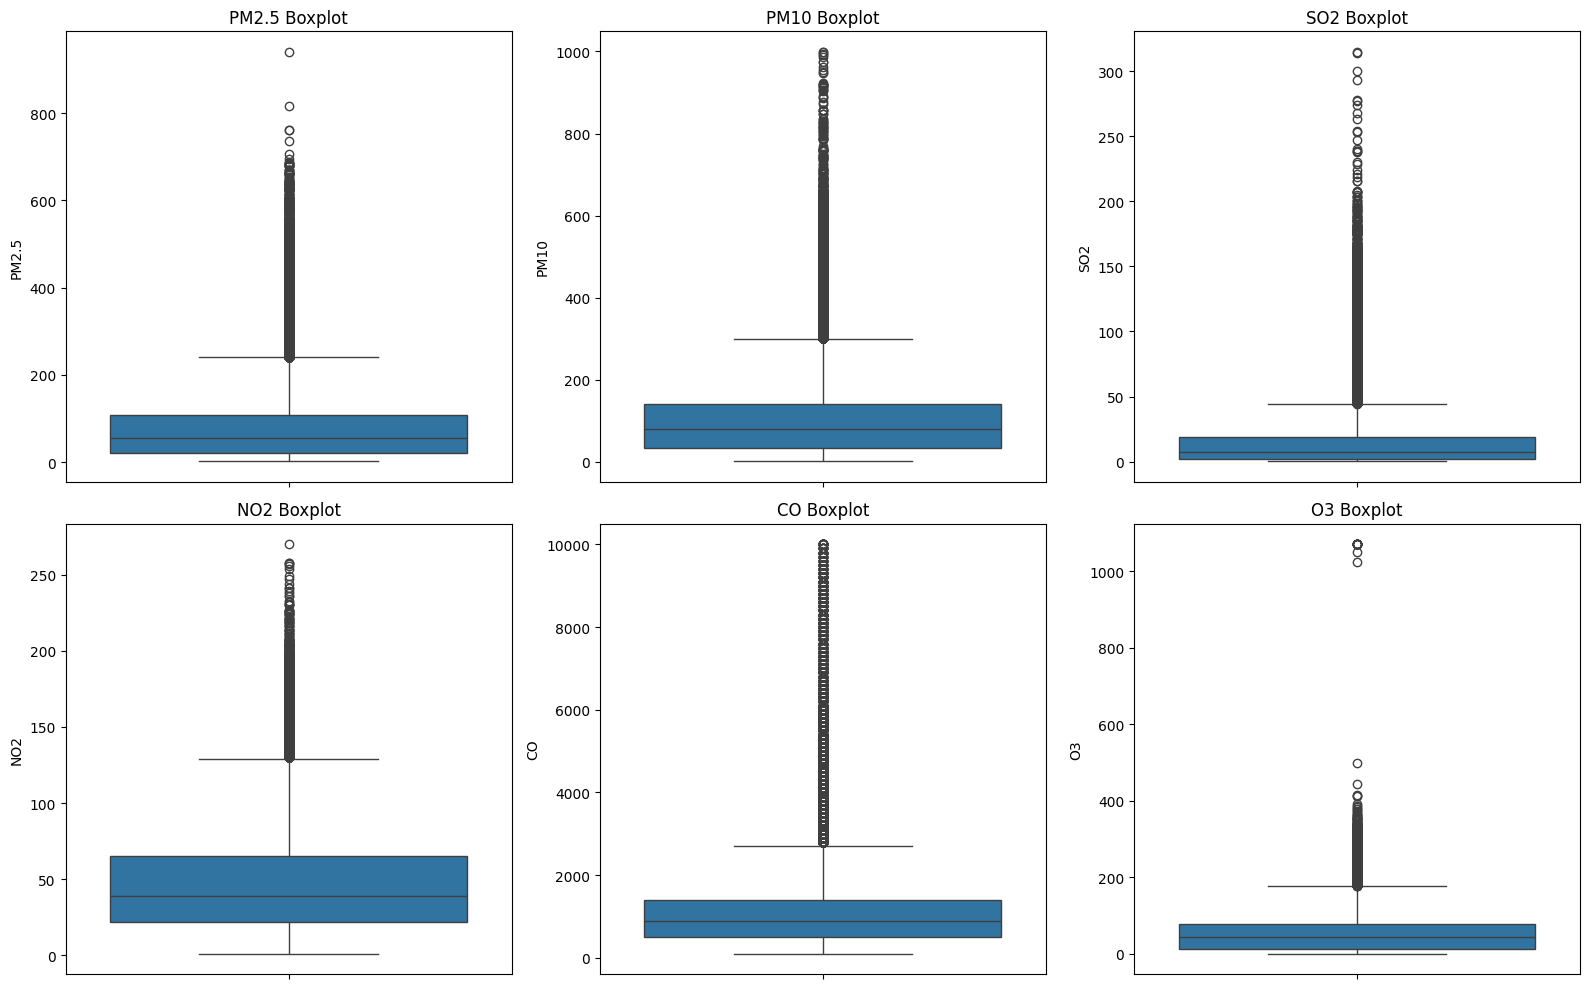

In [16]:
# Outlier Detection
plt.figure(figsize=(16, 10))
for i, col in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

In [17]:
# Handling Outliers
# Pollutant columns
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Container for cleaned subsets
stationwise_cleaned = []

# Group by station_type
for name, group in df_cleaned.groupby('station_type'):
    print(f"\nProcessing station type: {name}")

    # Z-scores for only the pollutants
    z_scores = group[pollutants].apply(zscore)
    mask = (z_scores.abs() < 3).all(axis=1)

    cleaned_group = group[mask]

    print(f"Before: {group.shape}, After: {cleaned_group.shape}")

    stationwise_cleaned.append(cleaned_group)

# Concatenate the cleaned groups
df_final = pd.concat(stationwise_cleaned, ignore_index=True)

print("\n Final shape after station-wise outlier removal:", df_final.shape)



Processing station type: Industrial
Before: (35064, 30), After: (32879, 30)

Processing station type: Rural
Before: (35064, 30), After: (32406, 30)

Processing station type: Suburban
Before: (35064, 30), After: (32387, 30)

Processing station type: Urban
Before: (35064, 30), After: (32648, 30)

 Final shape after station-wise outlier removal: (130320, 30)


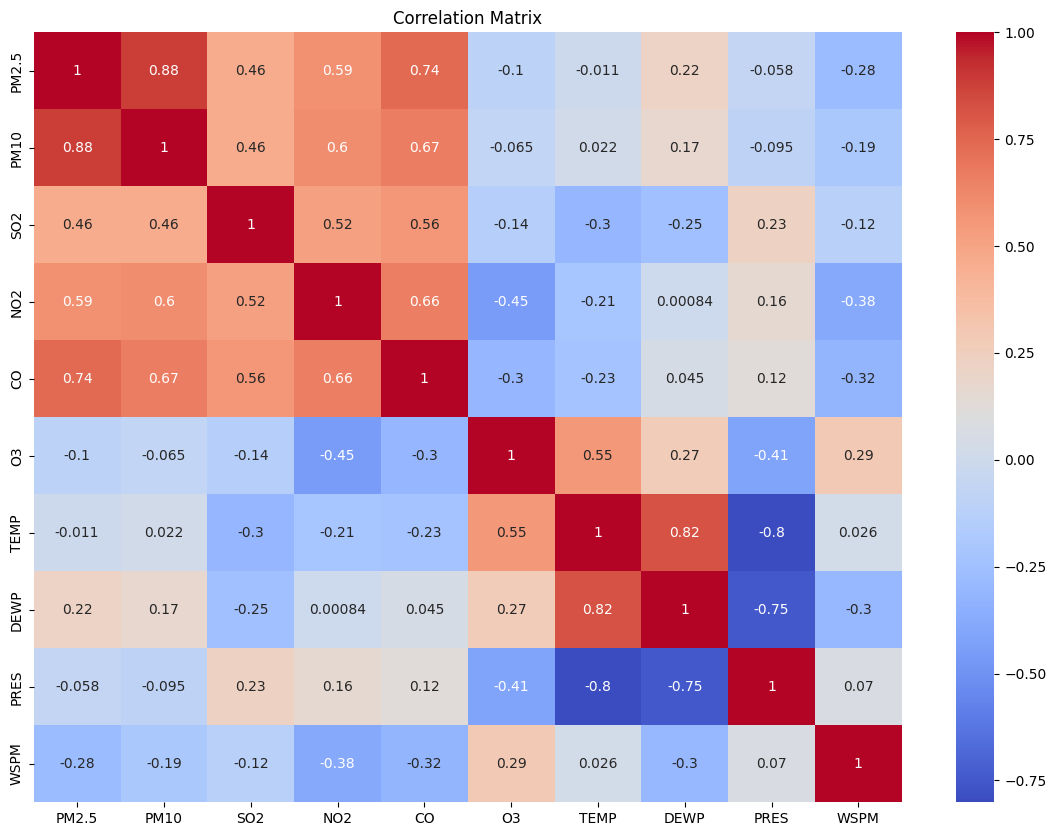

In [18]:
# Correlation heatmap- correlation among all numerical features
plt.figure(figsize=(14, 10))
sns.heatmap(df_final[pollutants + ['TEMP', 'DEWP', 'PRES', 'WSPM']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

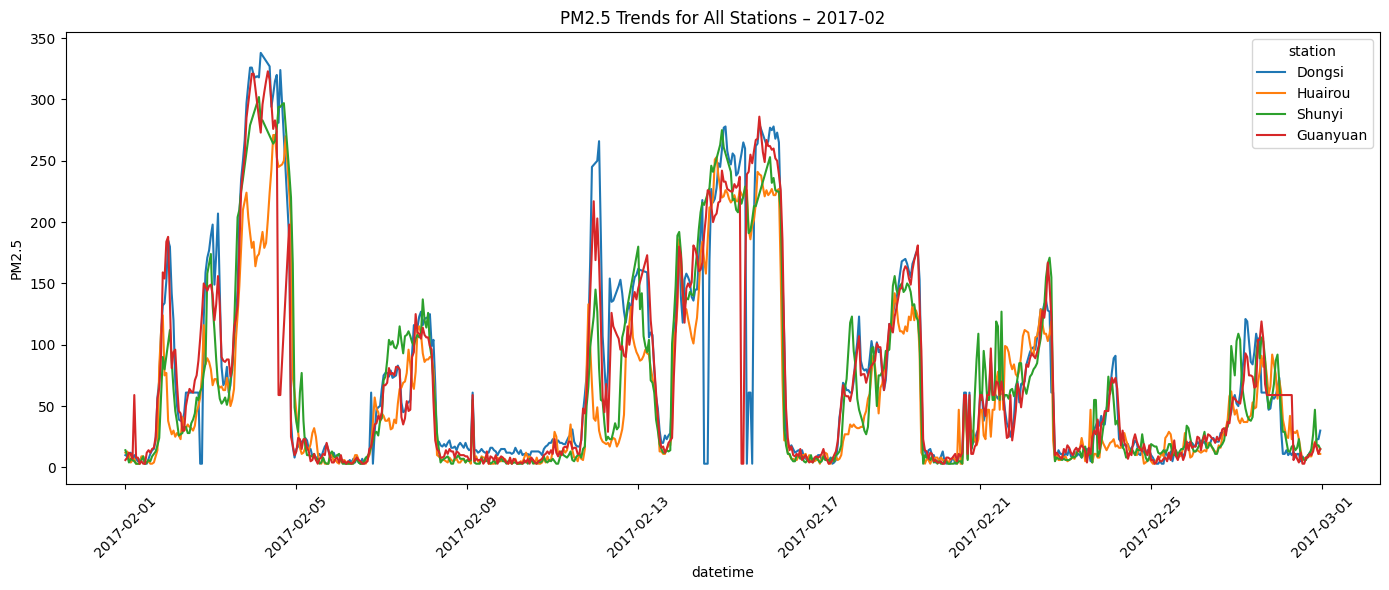

In [19]:
latest_date = df_final['datetime'].max()
latest_year = latest_date.year
latest_month = latest_date.month

# Filter data
latest_month_data = df_final[(df_final['datetime'].dt.year == latest_year) &
                              (df_final['datetime'].dt.month == latest_month)]

# Plot: PM2.5 trends for all stations in the latest month
plt.figure(figsize=(14, 6))
sns.lineplot(data=latest_month_data, x='datetime', y='PM2.5', hue='station')
plt.title(f"PM2.5 Trends for All Stations – {latest_year}-{latest_month:02d}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

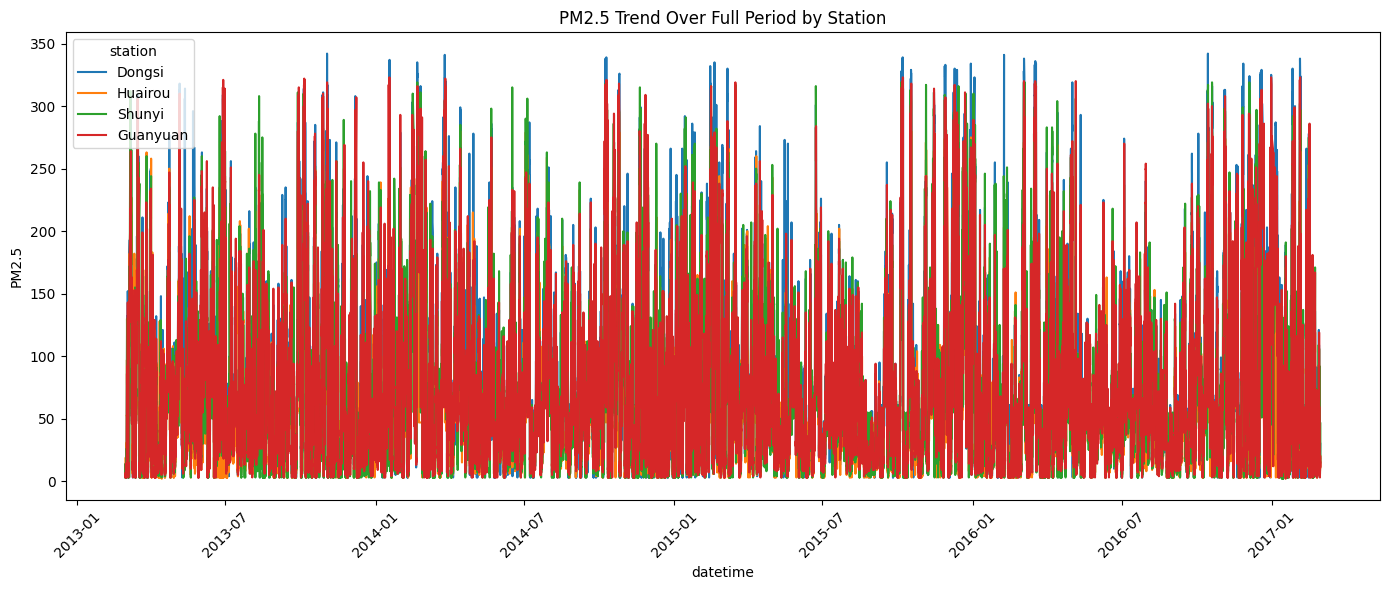

In [20]:
# PM2.5 Trend Over Full Time Period — Station-wise
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_final, x='datetime', y='PM2.5', hue='station')
plt.title("PM2.5 Trend Over Full Period by Station")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130320 entries, 0 to 130319
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   PM2.5         130320 non-null  float64       
 1   PM10          130320 non-null  float64       
 2   SO2           130320 non-null  float64       
 3   NO2           130320 non-null  float64       
 4   CO            130320 non-null  float64       
 5   O3            130320 non-null  float64       
 6   TEMP          130320 non-null  float64       
 7   PRES          130320 non-null  float64       
 8   DEWP          130320 non-null  float64       
 9   RAIN          130320 non-null  float64       
 10  WSPM          130320 non-null  float64       
 11  station       130320 non-null  object        
 12  station_type  130320 non-null  object        
 13  datetime      130320 non-null  datetime64[ns]
 14  wind_E        130320 non-null  bool          
 15  wind_ENE      130

In [22]:
#df_final.to_csv("df_final.csv", index=False)

<Figure size 1400x600 with 0 Axes>

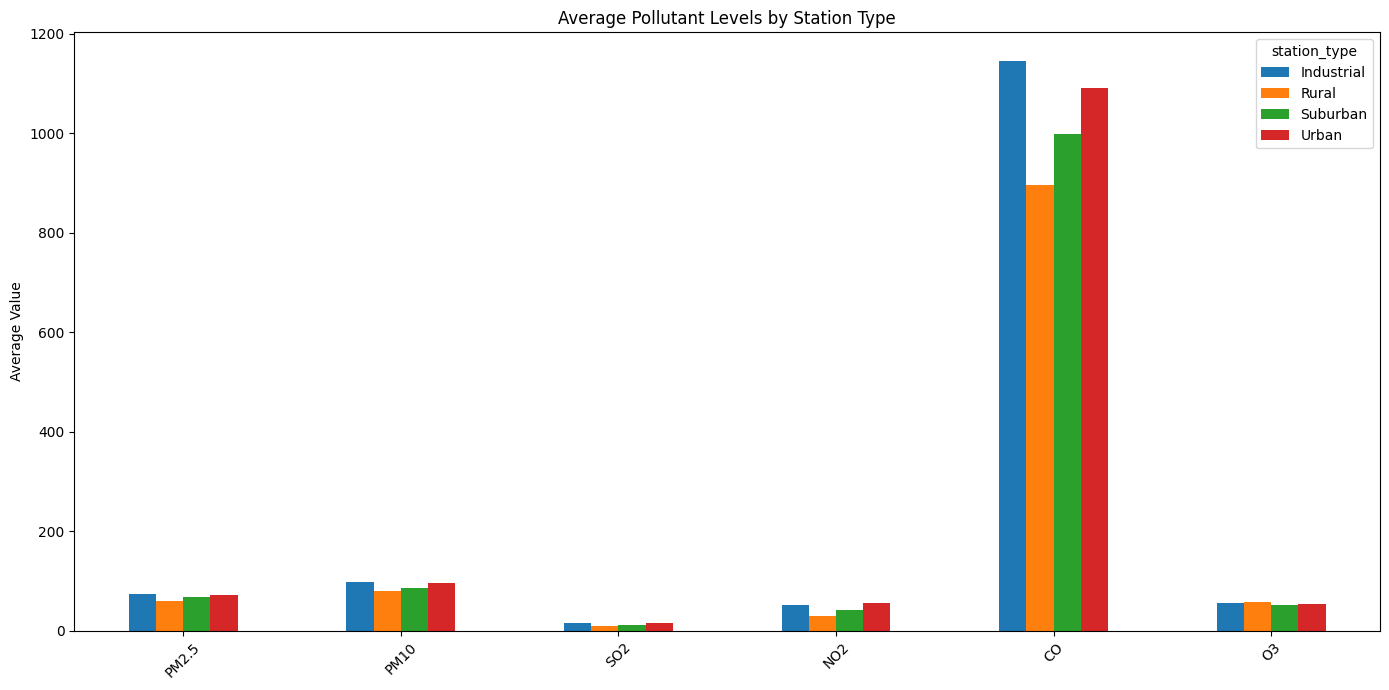

In [23]:
# Average Pollutant Levels by Station Type
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
mean_by_type = df_final.groupby('station_type')[pollutants].mean()

plt.figure(figsize=(14, 6))
mean_by_type.T.plot(kind='bar', figsize=(14, 7))
plt.title('Average Pollutant Levels by Station Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

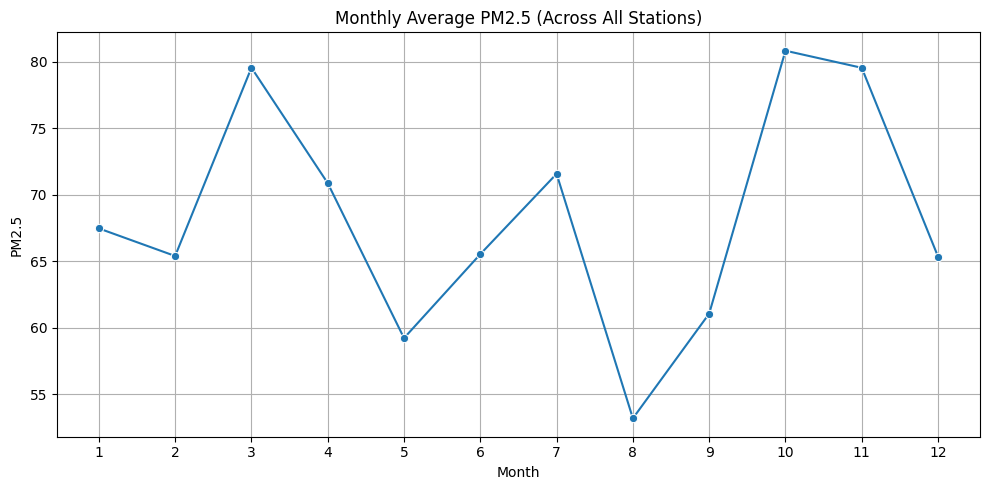

In [24]:
# Monthly PM2.5 Trend
df_final['month'] = df_final['datetime'].dt.month
monthly_avg = df_final.groupby('month')['PM2.5'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Monthly Average PM2.5 (Across All Stations)")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4209860389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_freq.index.str.replace('wind_', ''), y=wind_freq.values, palette='coolwarm')


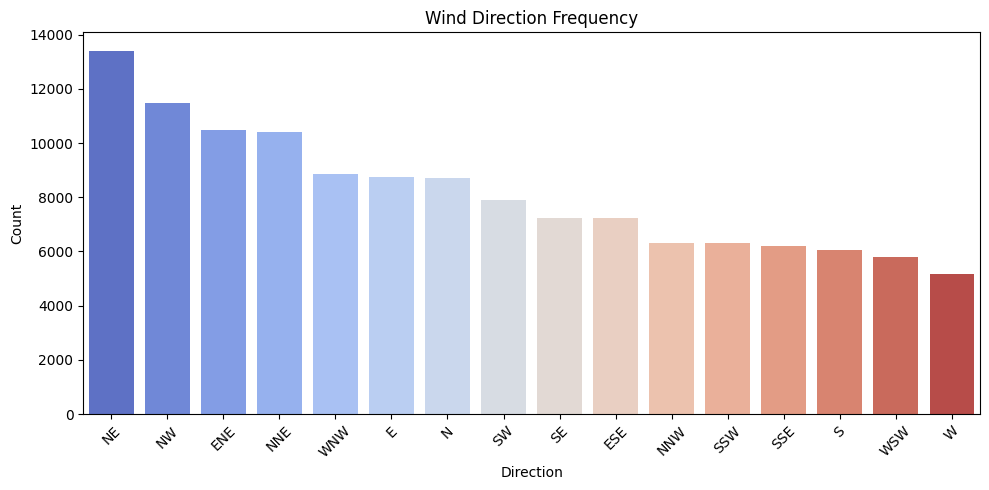

In [25]:
wind_columns = [col for col in df_final.columns if col.startswith("wind_")]
wind_freq = df_final[wind_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=wind_freq.index.str.replace('wind_', ''), y=wind_freq.values, palette='coolwarm')
plt.title("Wind Direction Frequency")
plt.ylabel("Count")
plt.xlabel("Direction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


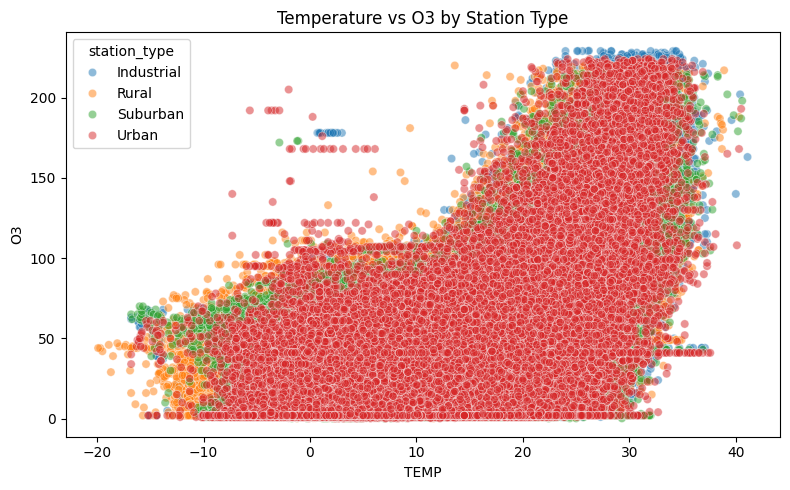

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_final, x='TEMP', y='O3', hue='station_type', alpha=0.5)
plt.title("Temperature vs O3 by Station Type")
plt.tight_layout()
plt.show()

In [27]:
# One-hot encode station and station_type
df_final = pd.get_dummies(df_final, columns=['station', 'station_type'], drop_first=False)

In [28]:
datetime_col = df_final['datetime']
df_final.drop(['datetime'], axis=1, inplace=True)

In [29]:
target = 'PM2.5'
exclude_cols = [target] + [col for col in df_final.columns if col.startswith('wind_')]  # wind_ is already binary
numerical_cols = df_final.select_dtypes(include=['float64', 'int64']).columns.tolist()
to_scale = [col for col in numerical_cols if col not in exclude_cols]

In [30]:
# Apply StandardScaler
scaler = StandardScaler()
df_final[to_scale] = scaler.fit_transform(df_final[to_scale])

In [31]:
df_final['datetime'] = datetime_col # restoring datetime

In [32]:
df_final.shape

(130320, 37)

In [33]:
# Train/Test Split
X = df_final.drop(['PM2.5', 'datetime'], axis=1)
y = df_final['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

print(" Training set shape:", X_train.shape)
print(" Test set shape:", X_test.shape)

 Training set shape: (78192, 35)
 Test set shape: (52128, 35)


In [34]:
# Initializing and training model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test)


In [35]:
# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluation results
print("Linear Regression Performance:")
print(f"R² Score     : {r2_lr:.4f}")
print(f"RMSE         : {rmse_lr:.4f}")
print(f"MAE          : {mae_lr:.4f}")

Linear Regression Performance:
R² Score     : 0.8402
RMSE         : 24.7701
MAE          : 17.1417


In [36]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [37]:
# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

In [38]:
import joblib

joblib.dump(lr_model, "models/linear_regression_model.pkl")
joblib.dump(xgb_model, "models/xgboost_model.pkl")

print("Models saved successfully.")

Models saved successfully.


In [39]:
# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("XGBoost Regressor Performance:")
print(f"R² Score     : {r2_xgb:.4f}")
print(f"RMSE         : {rmse_xgb:.4f}")
print(f"MAE          : {mae_xgb:.4f}")


XGBoost Regressor Performance:
R² Score     : 0.9165
RMSE         : 17.8977
MAE          : 11.8314


In [40]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "XGBoost Regressor"],
    "R² Score": [r2_lr, r2_xgb],
    "RMSE": [rmse_lr, rmse_xgb],
    "MAE": [mae_lr, mae_xgb]
})

results_df.to_csv("model_results.csv", index=False)
print("Evaluation results saved to model_results.csv.")

Evaluation results saved to model_results.csv.


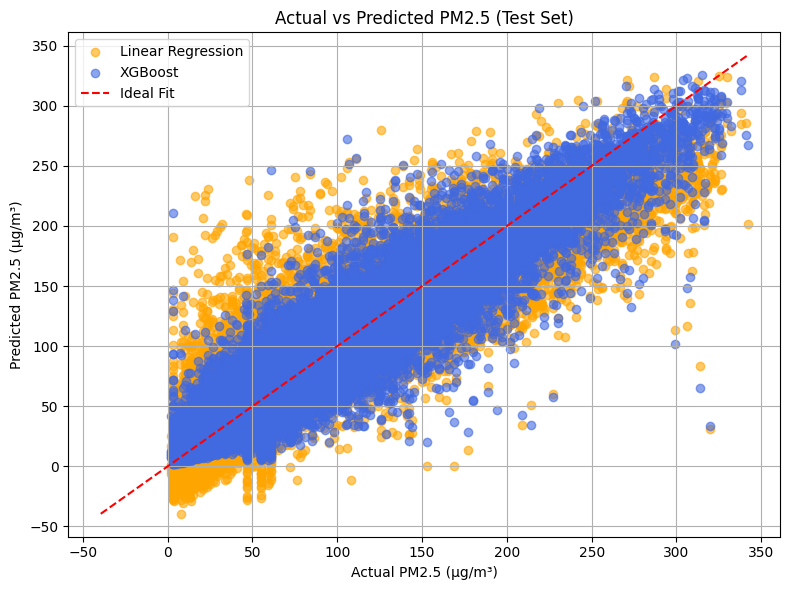

In [41]:
# Actual vs Predicted scatter plot for both models
plt.figure(figsize=(8, 6))

# Linear Regression points
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='orange', label='Linear Regression')

# XGBoost points
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='royalblue', label='XGBoost')

# Ideal fit line
min_val = min(y_test.min(), y_pred_lr.min(), y_pred_xgb.min())
max_val = max(y_test.max(), y_pred_lr.max(), y_pred_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Fit')

# Labels and title
plt.xlabel("Actual PM2.5 (µg/m³)")
plt.ylabel("Predicted PM2.5 (µg/m³)")
plt.title("Actual vs Predicted PM2.5 (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()

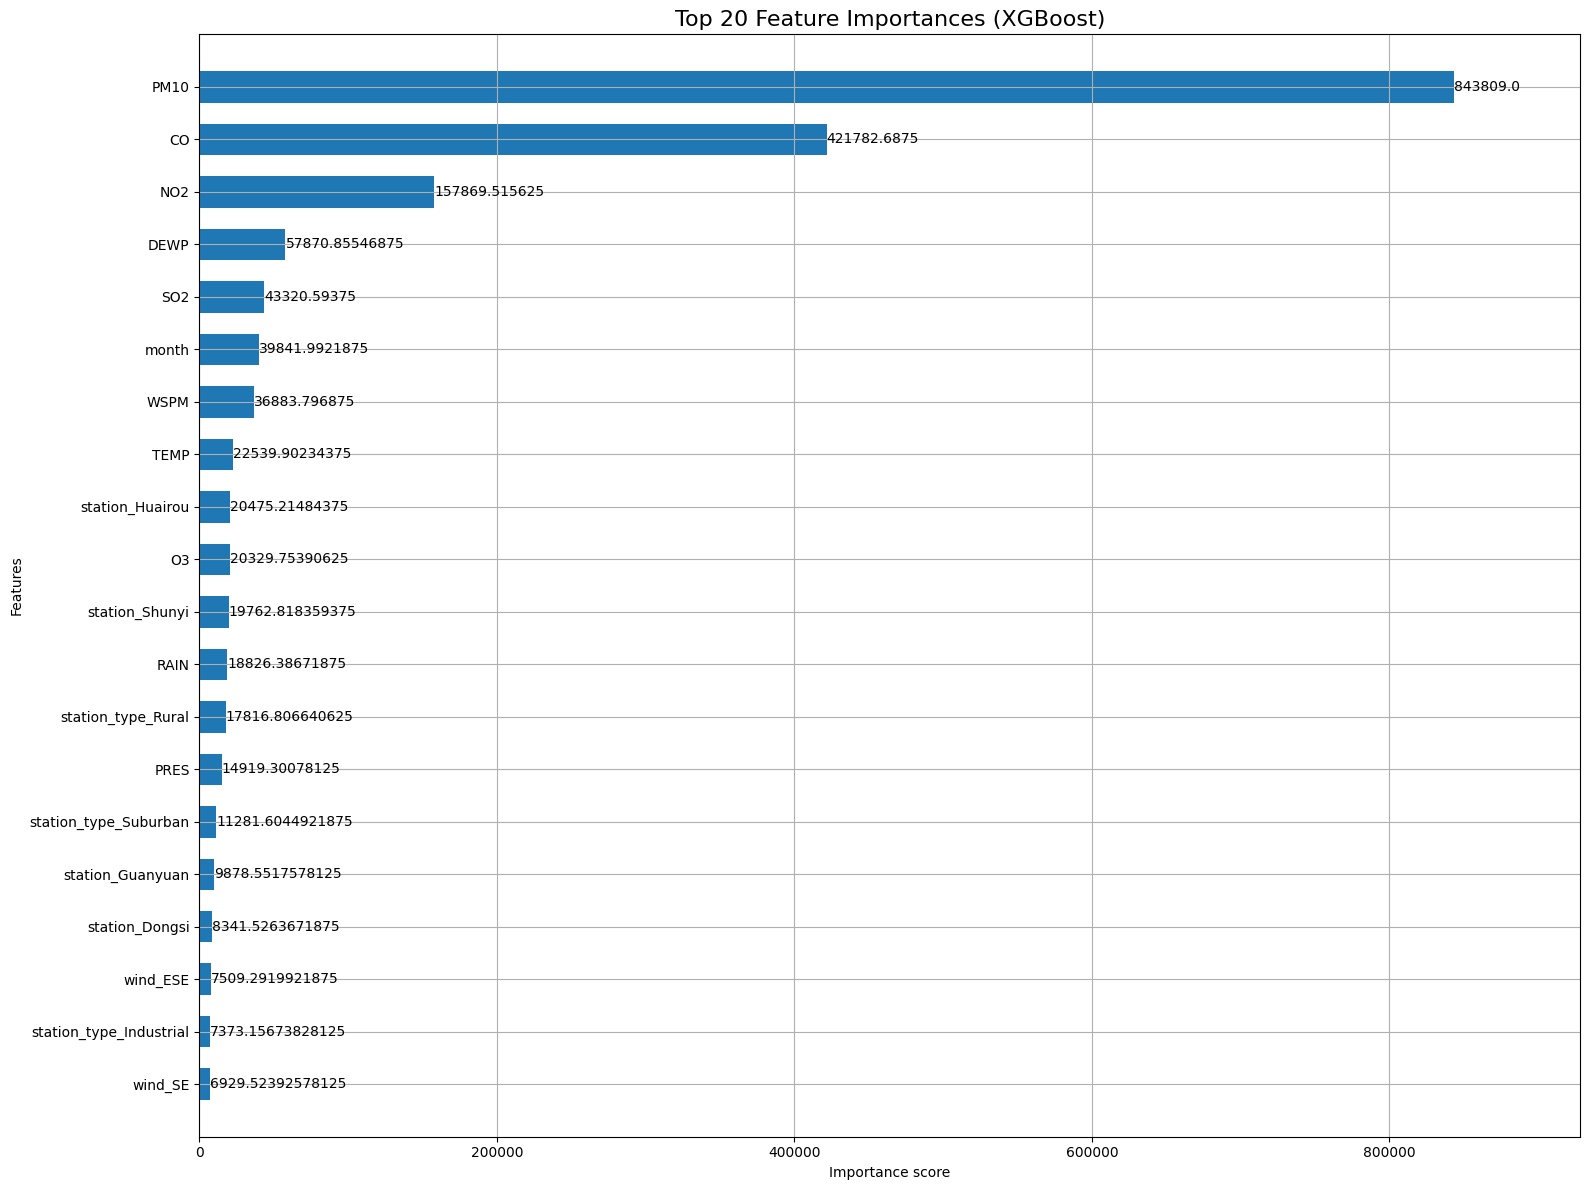

In [42]:
# Plot: top 20 most important features
fig, ax = plt.subplots(figsize=(16, 12))
plot_importance(xgb_model, max_num_features=20, importance_type='gain', height=0.6, ax=ax)
plt.title('Top 20 Feature Importances (XGBoost)', fontsize=16)
plt.tight_layout()
plt.show()

In [43]:
! pip install streamlit -q

In [44]:
! wget -q -O - ipv4.icanhazip.com

34.139.11.172


In [ ]:
! streamlit run Home.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.11.172:8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://petite-buses-follow.loca.lt
